# 02 Path Integral Calculation

Calculating Lagrangian and Action for given price/volatility paths.

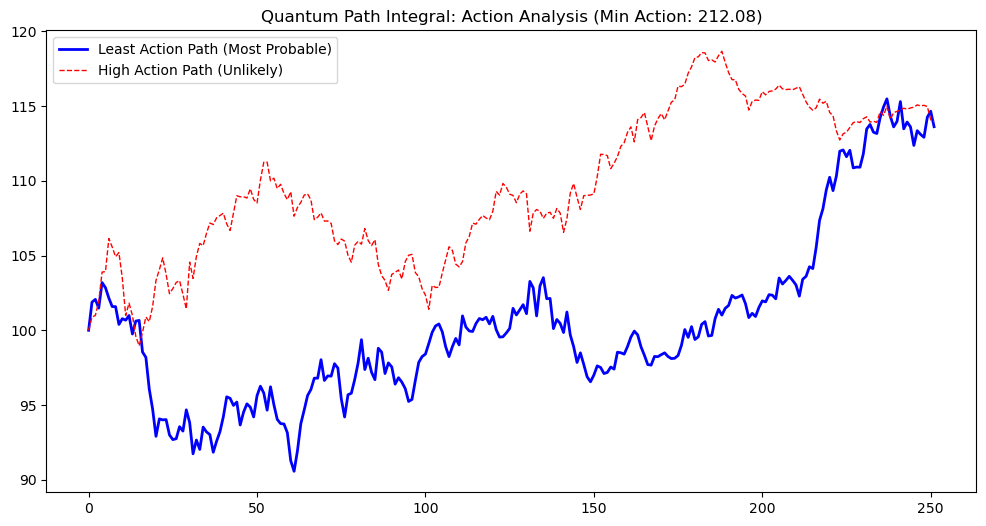

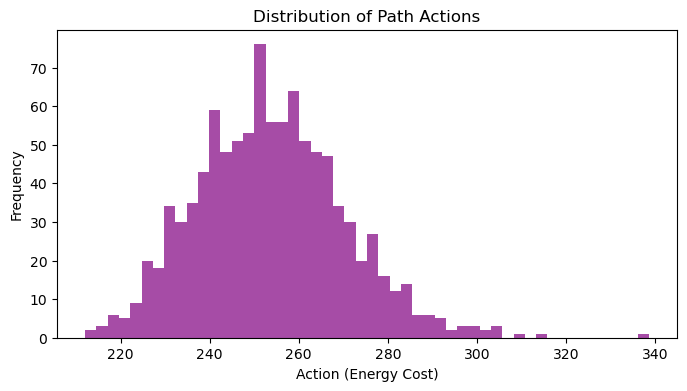

In [1]:
import sys
import os
import torch
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))

from src.physics_engine import HestonSimulator
from src.quantum_solver import PathIntegralSolver

# 1. 시뮬레이션 (Phase 1)
# 1000개의 경로만 생성해봅니다.
sim = HestonSimulator(mu=0.05, kappa=2.0, theta=0.04, xi=0.3, rho=-0.7)
S_paths, v_paths = sim.simulate(S0=100, v0=0.04, T=1.0, dt=1/252, num_paths=1000)

# 2. 퀀텀 솔버 초기화 및 Action 계산 (Phase 2)
solver = PathIntegralSolver(sim)
actions = solver.compute_action(S_paths, v_paths, dt=1/252)

# 3. 결과 분석
# Action이 낮은 경로(발생 확률 높은 경로)와 높은 경로(이상한 경로) 비교
min_idx = torch.argmin(actions) # 가장 자연스러운 경로 (Least Action Path)
max_idx = torch.argmax(actions) # 가장 부자연스러운 경로

S_cpu = S_paths.cpu().numpy()

plt.figure(figsize=(12, 6))

# 가장 확률 높은 경로 (파란색)
plt.plot(S_cpu[min_idx], 'b-', linewidth=2, label='Least Action Path (Most Probable)')

# 가장 확률 낮은 경로 (빨간색 점선)
plt.plot(S_cpu[max_idx], 'r--', linewidth=1, label='High Action Path (Unlikely)')

plt.title(f"Quantum Path Integral: Action Analysis (Min Action: {actions[min_idx]:.2f})")
plt.legend()
plt.show()

# 4. Action 분포 확인
plt.figure(figsize=(8, 4))
plt.hist(actions.cpu().numpy(), bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Path Actions")
plt.xlabel("Action (Energy Cost)")
plt.ylabel("Frequency")
plt.show()